#Linear regression

In [359]:
%matplotlib inline
import pandas as pd
import numpy as np
import sys


class LinearRegression:
  def __init__(self,data_population,iters=1000,alpha=0.01,norm=False):
    self.matrix_dimension=len(data_population.columns)
    self.data=data_population.copy()
    self.iters=iters
    self.alpha=alpha
    if norm:
      self.__normaliation()

    self.__getVectors()

  def drawSoluthionGraph(self,x_size=10,y_size=5):
    import matplotlib.pyplot as plt
    if self.matrix_dimension==2:
      plt.figure(figsize=(x_size, y_size))
      plt.plot(self.data[self.data.columns[0]],self.data[self.data.columns[1]],label = 'data point',color="red" ,marker='o',linestyle='none')
      plt.plot(self.data[self.data.columns[1]],self.getPredict(self.data[self.data.columns[1]]),label ="y={}+{}x".format(self.theta[0][0],self.theta[1][0]) )
      plt.xlabel(self.data.columns[0]), plt.ylabel(self.data.columns[1])
      plt.legend()
      plt.show()
    elif self.matrix_dimension==3:
      from mpl_toolkits.mplot3d import Axes3D
      fig = plt.figure(figsize=(x_size, y_size))
      ax = Axes3D(fig)
     
      ax.plot_trisurf(self.data[self.data.columns[0]],self.data[self.data.columns[1]],
                      self.getPredict(self.data[self.data.columns[0]],self.data[self.data.columns[1]]))
                      #label = "z={}+{}x+{}y".format(round(self.theta[0][0],1),round(self.theta[1][0],1),round(self.theta[2][0]),1))
      ax.plot(self.data[self.data.columns[0]],self.data[self.data.columns[1]],
                      self.getPredict(self.data[self.data.columns[0]],self.data[self.data.columns[1]]),
                      label = "z={}+{}x+{}y".format(round(self.theta[0][0],8),round(self.theta[1][0],8),round(self.theta[2][0]),8),color="blue")
      ax.set_title('Data plot with linear regression')
      ax.scatter(self.data[self.data.columns[0]],self.data[self.data.columns[1]],self.data[self.data.columns[2]],label = 'data point',color="red")
      ax.set_xlabel(self.data.columns[0]),ax.set_ylabel(self.data.columns[1]),ax.set_zlabel(self.data.columns[2])
      ax.legend()
      ax.view_init(40, 300)
    else:
      print("Unable to plot")

  def drawGraphDependenceFunctionIterations(self,x_size=10,y_size=5):
    import matplotlib.pyplot as plt

    plt.figure(figsize=(x_size, y_size))
    plt.plot([i for i in range(self.iters)],self.J_iters)
    plt.xlabel('Iters'), plt.ylabel('F()')
    plt.title('Plot of the dependence of the target function on the number of iterations')
    plt.show()

  def __computeCost(self,X, Y):
    return (((X.dot(self.theta)-Y).transpose().dot((X.dot(self.theta)-Y)))/(2*len(X)))[0][0] 

  def gradientDescent(self):
    self.J_iters=[]
    for iter in range(self.iters):
      self.J_iters.append(self.__computeCost(self.X, self.Y))
      self.theta=self.theta-((self.alpha/len(y))*self.X.transpose()).dot((self.X.dot(self.theta)-self.Y))
    return self.theta

  def __getVectors(self):
    self.X = np.array(self.data[self.data.columns[:-1]])
    ones_vector = np.ones((len(self.X),1))
    self.X=np.hstack((ones_vector,self.X))
    self.Y = np.array(self.data[self.data.columns[-1:]])
    self.theta=np.resize(np.array([0 for _ in range(self.matrix_dimension)]),(self.matrix_dimension,1))

  def __normaliation(self):
    for colum in list(self.data.columns):
      self.data[colum]=(self.data[colum]-self.data[colum].mean())/self.data[colum].std()
    
  def getPredict(self,*nums):
    if len(nums)>self.matrix_dimension-1:
      print('too many options')
      sys.exit()
    result=self.theta[0][0]
    for i in range(len(nums)):
      result+=nums[i]*self.theta[i+1][0]
    return result


##univariate linear regression


load dataset

In [315]:
data_univariate = pd.read_csv("/content/ex1data1.txt")
data_univariate.head(5)

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


iters=1000,alpha=0.01

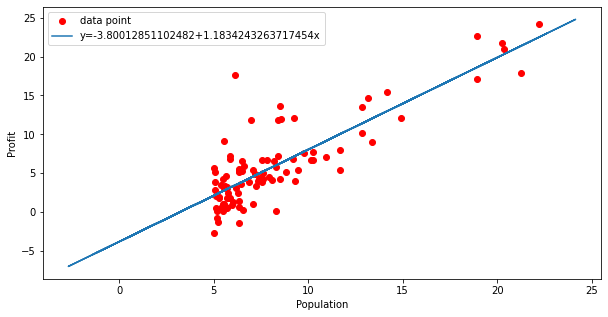

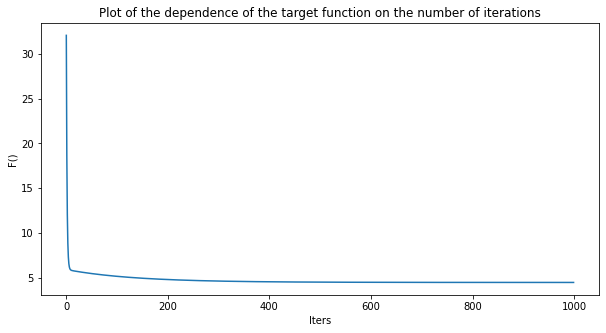

8.034114752692634


In [317]:
predict=LinearRegression(data_univariate,iters=1000,alpha=0.01)
predict.gradientDescent()
predict.drawSoluthionGraph()
predict.drawGraphDependenceFunctionIterations()

print(predict.getPredict(10))


iters=200,alpha=0.05

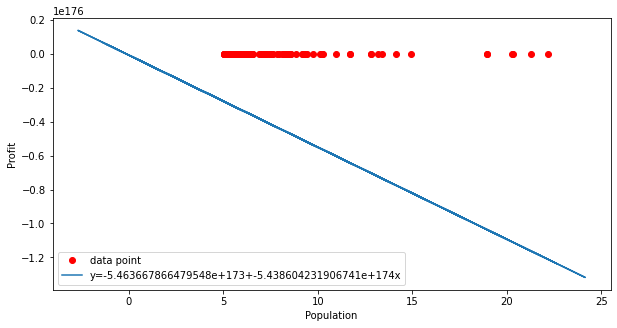

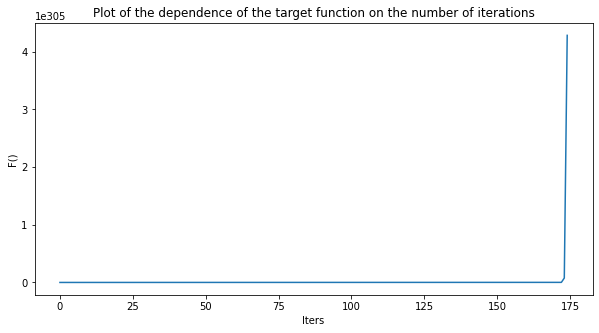

In [318]:
predict=LinearRegression(data_univariate,iters=200,alpha=0.05)
predict.gradientDescent()
predict.drawSoluthionGraph()
predict.drawGraphDependenceFunctionIterations()

iters=1000,alpha=0.001

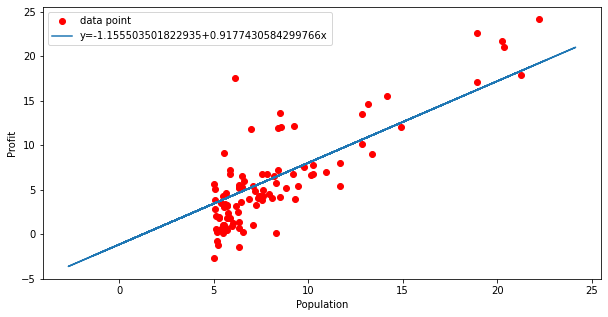

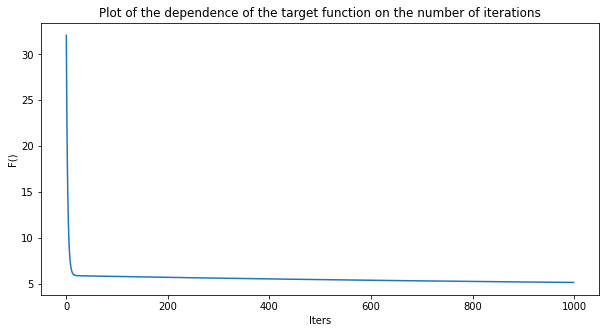

In [319]:
predict=LinearRegression(data_univariate,iters=1000,alpha=0.001)
predict.gradientDescent() 
predict.drawSoluthionGraph()
predict.drawGraphDependenceFunctionIterations()

Conclusion: If the step size alpha is too large, the probability to overcome the minimum is high. If alpha is too small, we use more iterations, but the probability of hitting the minimum decreases.



##multiple  linear regression 


In [320]:
data_multiple = pd.read_csv("/content/ex1data2.txt")
data_multiple.head(5)

,size,bedrooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


iters=1000,alpha=0.01

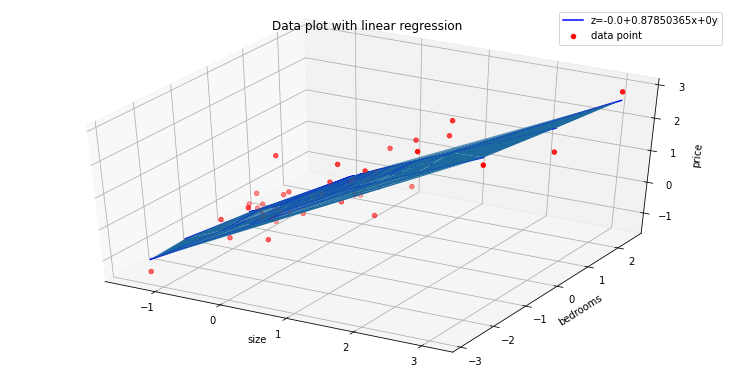

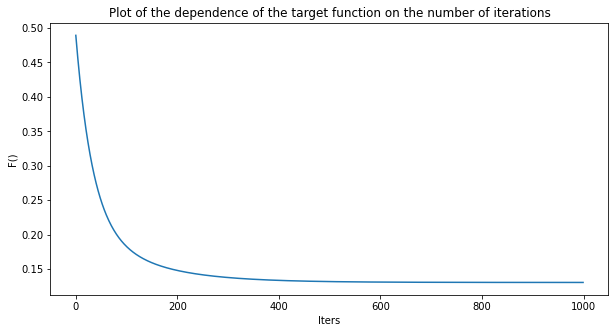

2635.323290041009


In [360]:
predict=LinearRegression(data_multiple,iters=1000,alpha=0.01,norm=True)
predict.gradientDescent()
predict.drawSoluthionGraph()
predict.drawGraphDependenceFunctionIterations()

print(predict.getPredict(3000,4))

With multiple linear regression, you need to normalize the data because the range in each column is different.

#Linear Regression in sklearn


univariate linear regression

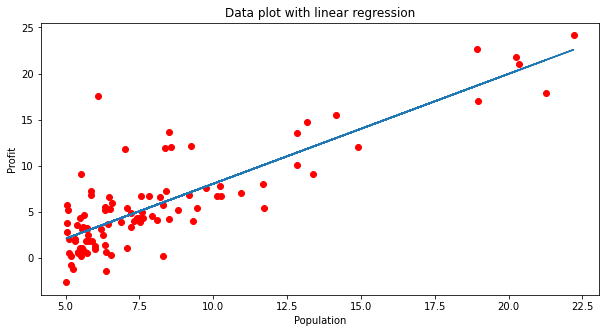

[[8.03455556]]


In [347]:
from sklearn import linear_model

data = pd.read_csv("/content/ex1data1.txt")

model = linear_model.LinearRegression()
X = np.array(data[data.columns[:-1]])
Y = np.array(data[data.columns[-1:]])
model.fit(X, Y)

f = model.predict(X)

plt.figure(figsize=(10, 5))
plt.plot(data[data.columns[0]],data[data.columns[1]],label = 'data point',color="red" ,marker='o',linestyle='none')
plt.plot(data[data.columns[0]],f)
plt.xlabel('Population'), plt.ylabel('Profit')
plt.title('Data plot with linear regression')
plt.show()


f = model.predict([[10]])
print(f)




multiple  linear regression 

[[2654.08524829]]


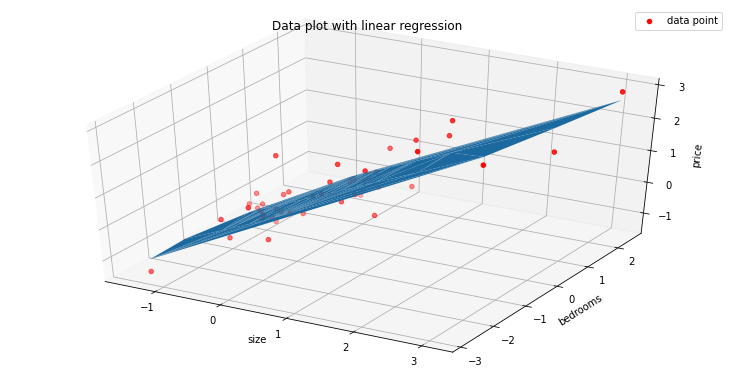

In [439]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn import linear_model
from time import sleep

data = pd.read_csv("/content/ex1data2.txt")
for colum in list(data.columns):
      data[colum]=(data[colum]-data[colum].mean())/data[colum].std()

model = linear_model.LinearRegression()
X = np.array(data[data.columns[:-1]])
Y = np.array(data[data.columns[-1:]])
model.fit(X, Y)

f = model.predict(X)


fig = plt.figure(figsize=(10, 5))
ax = Axes3D(fig)
ax.plot_trisurf(data[data.columns[0]],data[data.columns[1]],[list(i)[0] for i in f])
ax.scatter(data[data.columns[0]],data[data.columns[1]],data[data.columns[2]],label = 'data point',color="red")
ax.set_xlabel(data.columns[0]),ax.set_ylabel(data.columns[1]),ax.set_zlabel(data.columns[2])
ax.set_title('Data plot with linear regression')
ax.legend()
ax.view_init(40, 300)

print(model.predict([[3000,4]]))
